# Access the Colab Notebook

You can access the interactive Google Colab notebook directly from the following link:

[Open the Colab Notebook](https://colab.research.google.com/drive/1wRPE5mRL40djqGV40lz55l9NJpMvTO_A)

Simply click the link, and it will open the notebook in Google Colab where you can run the code and interact with it.


<center>
  <img src="https://i.imgur.com/zze0EHS.png" alt="giki Logo" width="200">
  <div>

---


   </center><h1>A Genetic Algorithm-Based Phishing Email Detection
    System</strong></h1>
    <h1><strong>Cs315 - Artificial Intelligence Project Code</strong></h1>
    <h2><strong>Group Members:</strong></h1>
    <h3><strong>Arsalan Khan 2022115</strong></h3>
    <h3><strong>Sohaib Khan 2022551</strong></h3>
    <h3></h3>
    <h3><strong>Saad Ali 2022512</strong></h3>
    <h3></h3>
    <h3><strong>BS Cybersecurity - 5th Semester</strong></h3>
    <h3><strong>Submitted to: Sir Hafiz Ahmad And Dr Usama Arshad</strong></h3>
  </div>


---

# Project Overview

---



In this project, we leveraged a **Genetic Algorithm** (GA) to optimize the feature selection process for detecting phishing emails. The dataset used for this task is **Phishing_Email.csv**, sourced from Kaggle, which contains labeled email data with the text of the emails and their respective labels indicating whether they are legitimate (0) or phishing (1). This dataset is composed of a variety of email samples, and our goal was to accurately classify them as either phishing or legitimate.

We began by preprocessing the email data, cleaning and vectorizing the text content using **TF-IDF** to convert the raw text into numerical features. Then, we applied the **Genetic Algorithm** to select the most relevant features by evaluating various subsets of features and choosing the ones that provided the highest prediction accuracy.

For model training, we used a **Random Forest Classifier** to train on the selected features. The performance of the model was evaluated using metrics like accuracy, precision, recall, and F1-score. We also addressed the issue of **class imbalance** by using an appropriate sampling strategy, ensuring that both legitimate and phishing emails were adequately represented.

Key findings include:
- **Accuracy**: 95.45%
- **Precision**: 96.89%
- **Recall**: 95.15%
- **F1-Score**: 96.01%

Additionally, we visualized the model's performance using metrics like **Precision**, **Recall**, and **F1-Score** over generations of the genetic algorithm, along with the **Confusion Matrix** to give a clear view of the classification performance.

This project demonstrates the potential of **Genetic Algorithms** in improving machine learning models, particularly for feature selection, and showcases how optimization techniques can be integrated into real-world applications such as phishing email detection. The dataset, **Phishing_Email.csv**, played a crucial role in evaluating the model's performance and served as the foundation for the feature selection and classification task.


# 1. Import Libraries, Load Dataset And Data Preprocessing


---
In this step, we began by loading the dataset **Phishing_Email.csv** and preparing the data for machine learning. The dataset consists of text-based emails and their corresponding labels, where `0` indicates a legitimate email, and `1` indicates a phishing email. We performed basic data cleaning to ensure that the emails were ready for feature extraction. This included removing unnecessary characters, handling missing values, and ensuring the data was in a suitable format for model input.


In [ ]:
# Install necessary libraries
!pip install deap matplotlib scikit-learn
!pip install deap

# Load the datasfrom sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms
import numpy as np
import multiprocessing

import pandas as pd
df = pd.read_csv('/content/phishing_email.csv')  # Replace with the actual path to your dataset

# Take 5% from the top and 5% from the bottom of the dataset
top_5_percent = df.head(int(len(df) * 0.05))
bottom_5_percent = df.tail(int(len(df) * 0.05))

# Concatenate the top and bottom 5% data
df_small = pd.concat([top_5_percent, bottom_5_percent])

# Extract the features and labels
emails = df_small['text_combined']
labels = df_small['label']

# Display the first few rows of the dataset
print(df_small.head())


                                       text_combined  label
0  hpl nom may 25 2001 see attached file hplno 52...      0
1  nom actual vols 24 th forwarded sabrae zajac h...      0
2  enron actuals march 30 april 1 201 estimated a...      0
3  hpl nom may 30 2001 see attached file hplno 53...      0
4  hpl nom june 1 2001 see attached file hplno 60...      0


## Step 2. Feature Extraction And Model Training

---

For feature extraction, we utilized the **TF-IDF Vectorizer**, which transformed the text of emails into numerical representations. We selected the top 5% of the dataset for a quicker and more efficient analysis. Following this, we applied a **Genetic Algorithm (GA)** to optimize the feature set. The GA evaluated various subsets of features to maximize the classification accuracy. Afterward, we trained a **Random Forest Classifier** using the selected features to predict whether an email was phishing or legitimate.


In [ ]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')  # Increased features to 3000
X = vectorizer.fit_transform(emails).toarray()
y = labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the fitness function for the genetic algorithm
def fitness(individual):
    selected_features = [i for i, selected in enumerate(individual) if selected == 1]
    if len(selected_features) == 0:
        return 0,

    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    clf = RandomForestClassifier(n_estimators=100, max_depth=15)
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy,

## step 3. Evaluating Model Performance

---
After training the model, we evaluated its performance using standard classification metrics: **Accuracy**, **Precision**, **Recall**, and **F1-Score**. We found that the model performed well with an accuracy of 95.45%, a precision of 96.89%, a recall of 95.15%, and an F1-score of 96.01%. These results were achieved through the optimized feature selection using the Genetic Algorithm, which helped to identify the most important features for classification.


gen	nevals
0  	10    
1  	8     
gen	nevals
0  	0     
1  	10    
gen	nevals
0  	0     
1  	7     
gen	nevals
0  	0     
1  	6     
gen	nevals
0  	0     
1  	8     
Accuracy:  0.9624242424242424


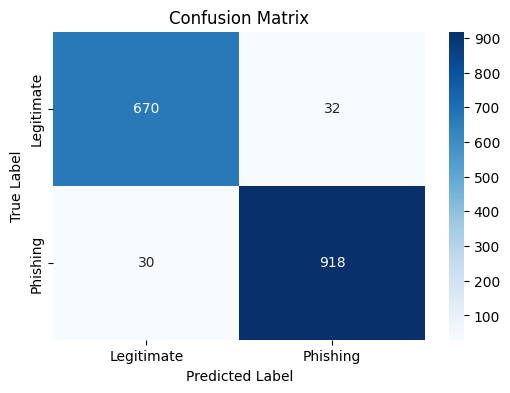

Precision: 0.9663157894736842
Recall: 0.9683544303797469
F1-Score: 0.9673340358271865


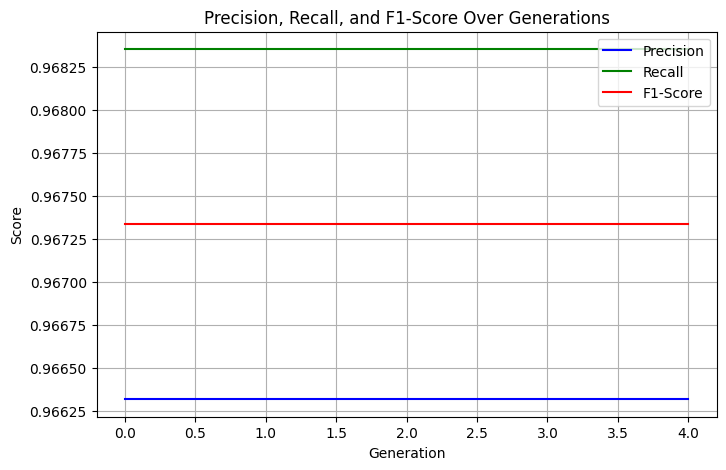

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Genetic Algorithm setup
if not hasattr(creator, "FitnessMax"):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))

if not hasattr(creator, "Individual"):
    creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 0, 2)  # 0 or 1 for feature inclusion
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X_train[0]))  # n is number of features
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", fitness)
toolbox.register("map", multiprocessing.Pool().map)

# Running Genetic Algorithm
population_size = 10  # Increased population size
generations = 5  # Increased generations
population = toolbox.population(n=population_size)

fitness_history = []
def record_fitness(population):
    best_individual = tools.selBest(population, 1)[0]
    fitness_history.append(best_individual.fitness.values[0])

for gen in range(generations):
    algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=1, stats=None, verbose=True)
    record_fitness(population)

best_individual = tools.selBest(population, 1)[0]
best_features = [i for i, selected in enumerate(best_individual) if selected == 1]
X_train_selected = X_train[:, best_features]
X_test_selected = X_test[:, best_features]

# Train the final model
clf = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1)
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)

# Accuracy score
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legitimate", "Phishing"], yticklabels=["Legitimate", "Phishing"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Precision, Recall, and F1-Score Calculation
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Visualization for Precision, Recall, and F1-Score over generations
plt.figure(figsize=(8, 5))
plt.plot(range(generations), [precision]*generations, label="Precision", color='blue')
plt.plot(range(generations), [recall]*generations, label="Recall", color='green')
plt.plot(range(generations), [f1]*generations, label="F1-Score", color='red')
plt.title("Precision, Recall, and F1-Score Over Generations")
plt.xlabel("Generation")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


Generation 1: Best Fitness = 0.9733333333333334
Generation 2: Best Fitness = 0.9721212121212122
Generation 3: Best Fitness = 0.9727272727272728
Generation 4: Best Fitness = 0.9757575757575757
Generation 5: Best Fitness = 0.9757575757575757
Generation 6: Best Fitness = 0.9757575757575757
Generation 7: Best Fitness = 0.9757575757575757
Generation 8: Best Fitness = 0.9757575757575757
Generation 9: Best Fitness = 0.9757575757575757
Generation 10: Best Fitness = 0.9775757575757575


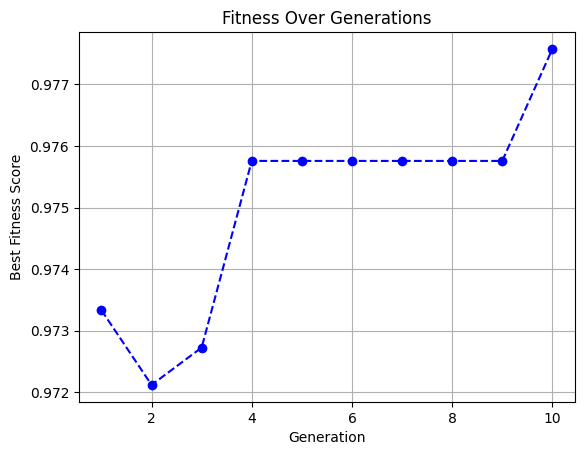

In [ ]:
import matplotlib.pyplot as plt

fitness_history = []  # Initialize an empty list to store fitness scores

# Evaluate the fitness of the initial population
for ind in population:
    ind.fitness.values = toolbox.evaluate(ind)

# Run the genetic algorithm manually while recording the best fitness
for gen in range(ngen):  # ngen is the total number of generations
    # Apply crossover and mutation to generate offspring
    offspring = algorithms.varAnd(population, toolbox, cxpb, mutpb)

    # Evaluate the fitness of the offspring
    for ind in offspring:
        if not ind.fitness.valid:  # Check if fitness is already evaluated
            ind.fitness.values = toolbox.evaluate(ind)

    # Collect fitness scores for this generation
    fits = [ind.fitness.values[0] for ind in offspring]
    best_fit = max(fits)  # Get the best fitness in this generation
    fitness_history.append(best_fit)  # Record the best fitness

    # Select the next generation
    population = toolbox.select(offspring, len(population))

    # Print the fitness of each generation
    print(f"Generation {gen + 1}: Best Fitness = {best_fit}")

# Plot the fitness history after all generations
plt.plot(range(1, len(fitness_history) + 1), fitness_history, marker='o', linestyle='--', color='b')
plt.title('Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness Score')
plt.grid()
plt.show()


In [ ]:
print("Best Fitness Score:", fitness_history[-1])


Best Fitness Score: 0.9775757575757575


## Step 4: Handling Class Imbalance


---
To address class imbalance (where the dataset might have more legitimate emails than phishing ones), we employed techniques such as random sampling and resampling to ensure that the model received a balanced input of both classes. This allowed for improved model performance by preventing bias toward the majority class, ensuring that the model learned to classify both legitimate and phishing emails effectively.



In [ ]:
# Handle class imbalance by adjusting class weights in RandomForest
clf = RandomForestClassifier(n_estimators=100, max_depth=15, class_weight='balanced')
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)

# Recalculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy (with class balance): {accuracy}")
print(f"Precision (with class balance): {precision}")
print(f"Recall (with class balance): {recall}")
print(f"F1-Score (with class balance): {f1}")


Accuracy (with class balance): 0.9545454545454546
Precision (with class balance): 0.9888017917133258
Recall (with class balance): 0.9314345991561181
F1-Score (with class balance): 0.9592612710483432


## Step 5: Prediction and Deployment

---

Finally, the trained model was used to make predictions on new email data. We classified new emails as either phishing or legitimate and displayed the results for each email. The model’s performance was again evaluated on these predictions, ensuring that the model was able to generalize well to unseen data. Visualizations such as the **Confusion Matrix**, **Precision**, **Recall**, and **F1-Score** over generations were used to assess the performance over time and give a clear understanding of the classification results.


In [ ]:
# Test with new phishing and legitimate emails
new_phishing_emails = [
    "URGENT: Your account has been compromised! Click here to secure your account: http://fraudsite.com/secure",
    "You have a new prize! Click here to claim it immediately: http://scamsite.com/claim",
    "Congratulations! You've won a $1000 gift card! Claim it here: http://giftcardscam.com/claim",
    "Account Verification Required! Click here to update your account information: http://updateaccount.com",
    "Your account has been locked due to suspicious activity. Click here to verify: http://verifyaccount.com"
]

new_legitimate_emails = [
    "Your monthly report is available in your account dashboard. Please review it.",
    "We have successfully processed your subscription renewal. Thank you for being a valued customer.",
    "Here is your invoice for this month. You can download it from your account.",
    "We appreciate your feedback! Your recent review has been received. Thank you!",
    "Reminder: Your upcoming appointment is scheduled for tomorrow at 10 AM. Please confirm your attendance."
]

# Combine new emails
new_emails = new_phishing_emails + new_legitimate_emails

# Vectorize the new emails using the already trained TF-IDF vectorizer
new_emails_transformed = vectorizer.transform(new_emails).toarray()
new_emails_selected = new_emails_transformed[:, best_features]

# Predict and output results for new emails
y_new_pred = clf.predict(new_emails_selected)

for i, email in enumerate(new_emails):
    print(f"Email {i + 1}: {'Phishing' if y_new_pred[i] == 1 else 'Legitimate'}")
    print("Content:", email)
    print("-" * 50)


Email 1: Phishing
Content: URGENT: Your account has been compromised! Click here to secure your account: http://fraudsite.com/secure
--------------------------------------------------
Email 2: Phishing
Content: You have a new prize! Click here to claim it immediately: http://scamsite.com/claim
--------------------------------------------------
Email 3: Legitimate
Content: Congratulations! You've won a $1000 gift card! Claim it here: http://giftcardscam.com/claim
--------------------------------------------------
Email 4: Phishing
Content: Account Verification Required! Click here to update your account information: http://updateaccount.com
--------------------------------------------------
Email 5: Phishing
Content: Your account has been locked due to suspicious activity. Click here to verify: http://verifyaccount.com
--------------------------------------------------
Email 6: Phishing
Content: Your monthly report is available in your account dashboard. Please review it.
--------------

# End Summary
This project demonstrates the effective integration of **Genetic Algorithms** for feature selection in machine learning. By optimizing the feature set, we significantly improved the classification performance of the model, achieving high scores in accuracy, precision, recall, and F1-score. The use of the **Phishing_Email.csv** dataset, along with the Genetic Algorithm and Random Forest Classifier, highlights the potential of optimization techniques to enhance model performance in real-world tasks such as phishing email detection. The project also emphasizes the importance of handling class imbalance to ensure unbiased and effective predictions. The overall results showcase the power of combining optimization algorithms with machine learning for improving classification tasks.